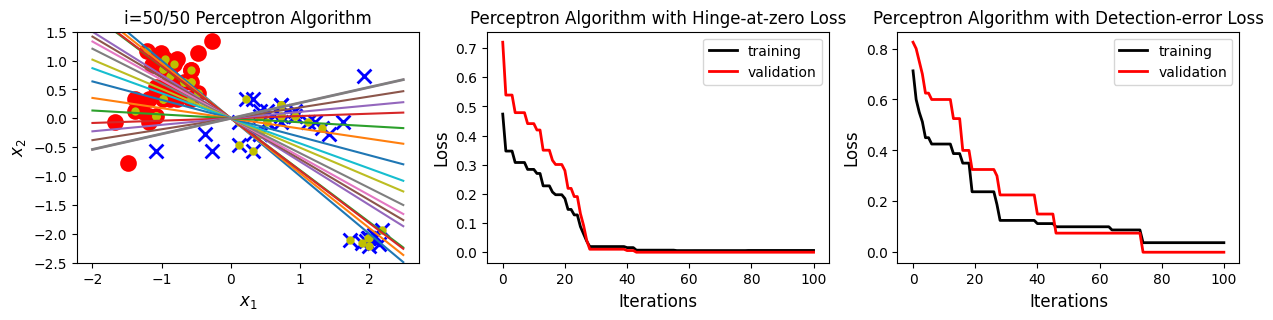

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from IPython.display import display, clear_output
import time
import random

# Problem 6.3

# Load dataset
data = loadmat('irisdatasetbinary.mat')
xtr = data['xtr']
ttr = data['ttr'].astype(int)
xval = data['xval']
tval = data['tval'].astype(int)

# # Initial plot
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
ax[0].scatter(xtr[0:40, 0], xtr[0:40, 1], c='r', marker='o', s=100, linewidths=2, label='Labelled as 0')
ax[0].scatter(xtr[40:80, 0], xtr[40:80, 1], c='b', marker='x', s=100, linewidths=2, label='Labelled as 1')
ax[0].set_xlabel('$x_1$', fontsize=14)
ax[0].set_ylabel('$x_2$', fontsize=14)

# Hyperparameters
I = 50
gamma = 0.1
th = np.array([-1, -1], dtype=float)  # Initialization

# Plot initial decision line
x_values = np.arange(-2, 2.5, 0.01)
y_values = -x_values * th[0] / th[1]
ax[0].plot(x_values, y_values)

# Initial title
ax[0].set_title(f'i=0/{I} Perceptron Algorithm')


# Iterations
for i in range(1, I+1):
    ax[0].set_title(f'i={i}/{I} Perceptron Algorithm')
    ind = np.random.choice(np.arange(80), 1)  # generate one random index
    ax[0].scatter(xtr[ind, 0], xtr[ind, 1], c='y', marker='o', s=16, linewidths=2)

    d = np.dot(th, xtr[ind, :].T)
    that = (d > 0)  # prediction
    tpm = 2 * ttr[ind][0] - 1  # signed label
    clmarg = tpm * d  # classification margin
    
    if clmarg < 0:  # classification is incorrect
        th = th + gamma * tpm * xtr[ind, :][0]
        y_values = -x_values * th[0] / th[1]
        ax[0].plot(x_values, y_values)
        ax[0].set_ylim([-2.5, 1.5])
    
    display(fig)
    clear_output(wait=True)
    time.sleep(0)

# Final decision line
ax[0].plot(x_values, y_values, linewidth=2)
ax[0].set_xlabel('$x_1$', fontsize=12)
ax[0].set_ylabel('$x_2$', fontsize=12)


# Initialize parameters
I = 100  # Number of iterations
gamma = 0.1  # Learning rate
th = np.array([-1, -1], dtype=float)  # Initialization

# Assume xtr, ttr, xval, tval are provided as numpy arrays

# Classification margins on the training set
clmargtr = (2 * ttr[:, 0] - 1) * np.dot(th, xtr.T)

# Training hinge-at-zero loss
trloss = [np.mean(-clmargtr * (clmargtr < 0))]

# Classification margins on the validation set
clmargval = (2 * tval[:, 0] - 1) * np.dot(th, xval.T)

# Validation hinge-at-zero loss
valloss = [np.mean(-clmargval * (clmargval < 0))]

# Training loop
for i in range(1, I + 1):
    ind = np.random.choice(np.arange(80), 1)  # generate one random index
    d = np.dot(th, xtr[ind, :].T)
    tpm = 2 * ttr[ind][0] - 1  # signed label
    clmarg = tpm * d  # classification margin

    # If classification is incorrect
    if clmarg < 0:  # classification is incorrect
        th += gamma * tpm * xtr[ind, :][0]

    # Update classification margins on the training set
    clmargtr = (2 * ttr[:, 0] - 1) * np.dot(th, xtr.T)
    trloss.append(np.mean(-clmargtr * (clmargtr < 0)))

    # Update classification margins on the validation set
    clmargval = (2 * tval[:, 0] - 1) * np.dot(th, xval.T)
    valloss.append(np.mean(-clmargval * (clmargval < 0)))

# Plotting
ax[1].plot(range(I + 1), trloss, 'k', linewidth=2, label='training')
ax[1].plot(range(I + 1), valloss, 'r', linewidth=2, label='validation')
ax[1].set_xlabel('Iterations', fontsize=12)
ax[1].set_ylabel('Loss', fontsize=12)
ax[1].set_title('Perceptron Algorithm with Hinge-at-zero Loss')
ax[1].legend()


# Initialize parameters
I = 100  # Number of iterations
gamma = 0.1  # Learning rate
th = np.array([-1, -1], dtype=float)  # Initialization

# Assume xtr, ttr, xval, tval are provided as numpy arrays

# Classification margins on the training set
clmargtr = (2 * ttr[:, 0] - 1) * np.dot(th, xtr.T)

# Training detection-error loss loss
trloss = [np.mean(clmargtr < 0)]

# Classification margins on the validation set
clmargval = (2 * tval[:, 0] - 1) * np.dot(th, xval.T)

# Validation detection-error loss loss
valloss = [np.mean(clmargval < 0)]

# Training loop
for i in range(1, I + 1):
    ind = np.random.choice(np.arange(80), 1)  # generate one random index
    d = np.dot(th, xtr[ind, :].T)
    tpm = 2 * ttr[ind][0] - 1  # signed label
    clmarg = tpm * d  # classification margin

    # If classification is incorrect
    if clmarg < 0:  # classification is incorrect
        th += gamma * tpm * xtr[ind, :][0]

    # Update classification margins on the training set
    clmargtr = (2 * ttr[:, 0] - 1) * np.dot(th, xtr.T)
    trloss.append(np.mean(clmargtr < 0))

    # Update classification margins on the validation set
    clmargval = (2 * tval[:, 0] - 1) * np.dot(th, xval.T)
    valloss.append(np.mean(clmargval < 0))

# Plotting
ax[2].plot(range(I + 1), trloss, 'k', linewidth=2, label='training')
ax[2].plot(range(I + 1), valloss, 'r', linewidth=2, label='validation')
ax[2].set_xlabel('Iterations', fontsize=12)
ax[2].set_ylabel('Loss', fontsize=12)
ax[2].legend()
ax[2].set_title('Perceptron Algorithm with Detection-error Loss')
plt.show()

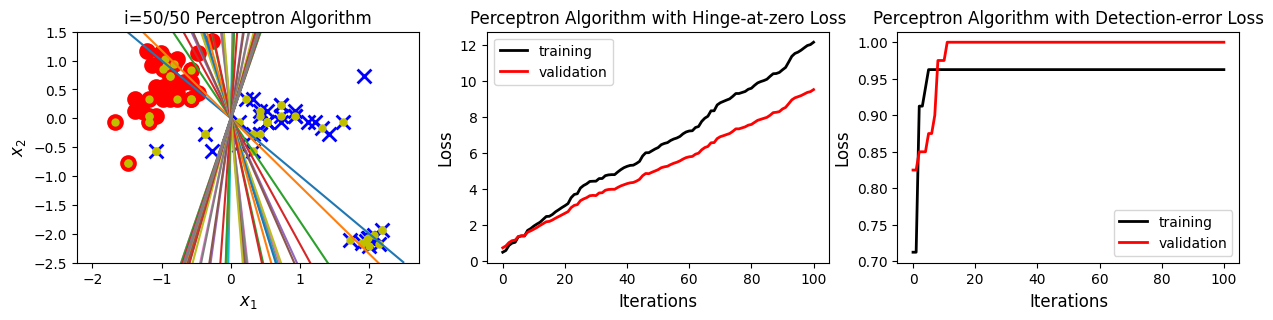

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from IPython.display import display, clear_output
import time
import random

# Problem 6.4

# Load dataset
data = loadmat('irisdatasetbinary.mat')
xtr = data['xtr']
ttr = data['ttr'].astype(int)
xval = data['xval']
tval = data['tval'].astype(int)

# # Initial plot
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
ax[0].scatter(xtr[0:40, 0], xtr[0:40, 1], c='r', marker='o', s=100, linewidths=2, label='Labelled as 0')
ax[0].scatter(xtr[40:80, 0], xtr[40:80, 1], c='b', marker='x', s=100, linewidths=2, label='Labelled as 1')
ax[0].set_xlabel('$x_1$', fontsize=14)
ax[0].set_ylabel('$x_2$', fontsize=14)

# Hyperparameters
I = 50
gamma = 0.1
th = np.array([-1, -1], dtype=float)  # Initialization

# Plot initial decision line
x_values = np.arange(-2, 2.5, 0.01)
y_values = -x_values * th[0] / th[1]
ax[0].plot(x_values, y_values)

# Initial title
ax[0].set_title(f'i=0/{I} Perceptron Algorithm')


# Iterations
for i in range(1, I+1):
    ax[0].set_title(f'i={i}/{I} Perceptron Algorithm')
    ind = np.random.choice(np.arange(80), 1)  # generate one random index
    ax[0].scatter(xtr[ind, 0], xtr[ind, 1], c='y', marker='o', s=16, linewidths=2)

    d = np.dot(th, xtr[ind, :].T)
    that = (d > 0)  # prediction
    tpm = 2 * ttr[ind][0] - 1  # signed label
    clmarg = tpm * d  # classification margin
    
    if clmarg < 1:  # classification is incorrect
        th = th - gamma * tpm * xtr[ind, :][0]
        y_values = -x_values * th[0] / th[1]
        ax[0].plot(x_values, y_values)
        ax[0].set_ylim([-2.5, 1.5])
    
    display(fig)
    clear_output(wait=True)
    time.sleep(0)

# Final decision line
ax[0].plot(x_values, y_values, linewidth=2)
ax[0].set_xlabel('$x_1$', fontsize=12)
ax[0].set_ylabel('$x_2$', fontsize=12)


# Initialize parameters
I = 100  # Number of iterations
gamma = 0.1  # Learning rate
th = np.array([-1, -1], dtype=float)  # Initialization

# Assume xtr, ttr, xval, tval are provided as numpy arrays

# Classification margins on the training set
clmargtr = (2 * ttr[:, 0] - 1) * np.dot(th, xtr.T)

# Training hinge-at-zero loss
trloss = [np.mean(-clmargtr * (clmargtr < 0))]

# Classification margins on the validation set
clmargval = (2 * tval[:, 0] - 1) * np.dot(th, xval.T)

# Validation hinge-at-zero loss
valloss = [np.mean(-clmargval * (clmargval < 0))]

# Training loop
for i in range(1, I + 1):
    ind = np.random.choice(np.arange(80), 1)  # generate one random index
    d = np.dot(th, xtr[ind, :].T)
    tpm = 2 * ttr[ind][0] - 1  # signed label
    clmarg = tpm * d  # classification margin

    # If classification is incorrect
    if clmarg < 1:  # classification is incorrect
        th -= gamma * tpm * xtr[ind, :][0]

    # Update classification margins on the training set
    clmargtr = (2 * ttr[:, 0] - 1) * np.dot(th, xtr.T)
    trloss.append(np.mean(-clmargtr * (clmargtr < 0)))

    # Update classification margins on the validation set
    clmargval = (2 * tval[:, 0] - 1) * np.dot(th, xval.T)
    valloss.append(np.mean(-clmargval * (clmargval < 0)))

# Plotting
ax[1].plot(range(I + 1), trloss, 'k', linewidth=2, label='training')
ax[1].plot(range(I + 1), valloss, 'r', linewidth=2, label='validation')
ax[1].set_xlabel('Iterations', fontsize=12)
ax[1].set_ylabel('Loss', fontsize=12)
ax[1].set_title('Perceptron Algorithm with Hinge-at-zero Loss')
ax[1].legend()


# Initialize parameters
I = 100  # Number of iterations
gamma = 0.1  # Learning rate
th = np.array([-1, -1], dtype=float)  # Initialization

# Assume xtr, ttr, xval, tval are provided as numpy arrays

# Classification margins on the training set
clmargtr = (2 * ttr[:, 0] - 1) * np.dot(th, xtr.T)

# Training detection-error loss loss
trloss = [np.mean(clmargtr < 0)]

# Classification margins on the validation set
clmargval = (2 * tval[:, 0] - 1) * np.dot(th, xval.T)

# Validation detection-error loss loss
valloss = [np.mean(clmargval < 0)]

# Training loop
for i in range(1, I + 1):
    ind = np.random.choice(np.arange(80), 1)  # generate one random index
    d = np.dot(th, xtr[ind, :].T)
    tpm = 2 * ttr[ind][0] - 1  # signed label
    clmarg = tpm * d  # classification margin

    # If classification is incorrect
    if clmarg < 1:  # classification is incorrect
        th -= gamma * tpm * xtr[ind, :][0]

    # Update classification margins on the training set
    clmargtr = (2 * ttr[:, 0] - 1) * np.dot(th, xtr.T)
    trloss.append(np.mean(clmargtr < 0))

    # Update classification margins on the validation set
    clmargval = (2 * tval[:, 0] - 1) * np.dot(th, xval.T)
    valloss.append(np.mean(clmargval < 0))

# Plotting
ax[2].plot(range(I + 1), trloss, 'k', linewidth=2, label='training')
ax[2].plot(range(I + 1), valloss, 'r', linewidth=2, label='validation')
ax[2].set_xlabel('Iterations', fontsize=12)
ax[2].set_ylabel('Loss', fontsize=12)
ax[2].legend()
ax[2].set_title('Perceptron Algorithm with Detection-error Loss')
plt.show()

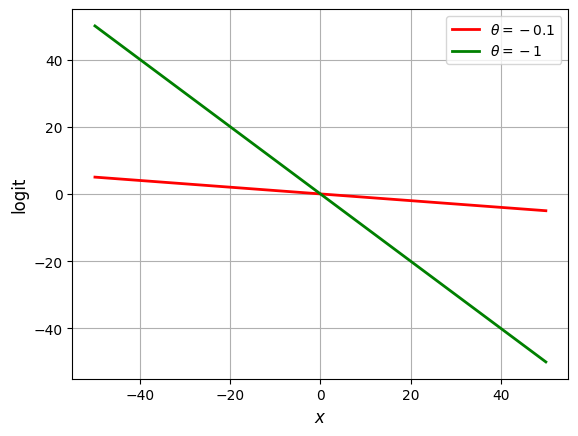

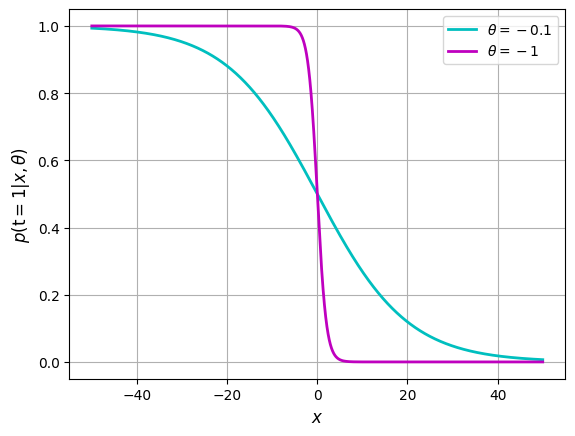

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 6.5

# Create x array from -50 to 50 with a step of 0.01
x = np.arange(-50, 50.01, 0.01)

# Plot figure 1
plt.figure(1)
plt.plot(x, -0.1*x, 'r', linewidth=2, label=r'$\theta=-0.1$')
plt.plot(x, -1*x, 'g', linewidth=2, label=r'$\theta=-1$')
plt.xlabel(r'$x$', fontsize=12)
plt.ylabel('logit', fontsize=12)
plt.legend()
plt.grid(True)

# Plot figure 2
plt.figure(2)
plt.plot(x, 1/(1 + np.exp(-(-0.1)*x)), 'c', linewidth=2, label=r'$\theta=-0.1$')
plt.plot(x, 1/(1 + np.exp(-(-1)*x)), 'm', linewidth=2, label=r'$\theta=-1$')
plt.xlabel(r'$x$', fontsize=12)
plt.ylabel(r'$p(\mathrm{t}=1|x,\theta)$', fontsize=12)
plt.legend()
plt.grid(True)

# Show both figures
plt.show()

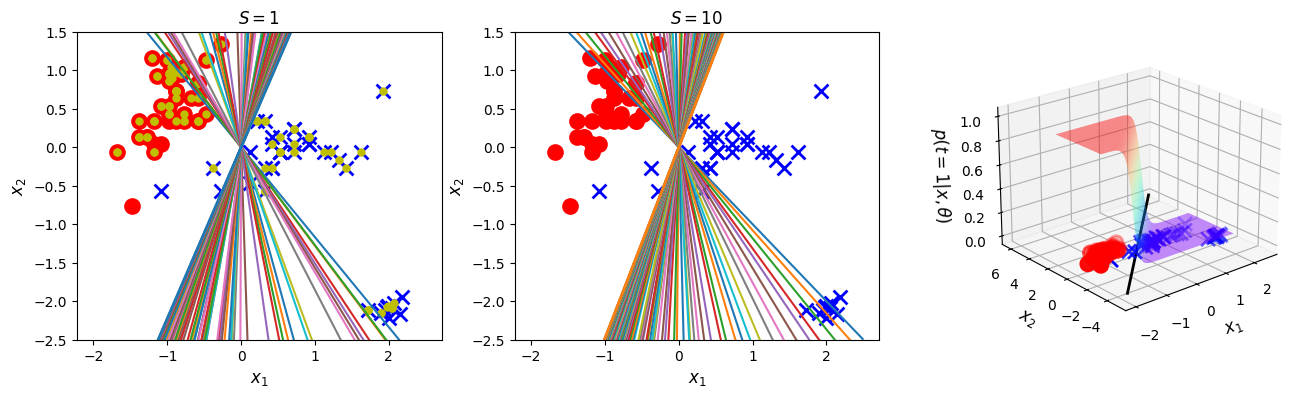

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from IPython.display import display, clear_output
from mpl_toolkits.mplot3d import Axes3D
import time

# Load dataset
data = loadmat('irisdatasetbinary.mat')
xtr = data['xtr']
ttr = data['ttr'].astype(int)

# Initial plot
fig = plt.figure(figsize=plt.figaspect(0.25))

ax = fig.add_subplot(1, 3, 1)

ax.scatter(xtr[0:40, 0], xtr[0:40, 1], c='r', marker='o', s=100, linewidths=2, label='Labelled as 0')
ax.scatter(xtr[40:80, 0], xtr[40:80, 1], c='b', marker='x', s=100, linewidths=2, label='Labelled as 1')
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)

# Hyperparameters
I = 100
gamma = 0.1
th = np.array([-1, -1], dtype=float)  # Initialization

# Initial title
ax.set_title(f'i=0/{I} - press Enter to iterate')

# Iterations
for i in range(1, I + 1):
    ax.set_title(f'i={i}/{I}')
    ind = np.random.choice(np.arange(80), 1)  # Generate one random index
    ax.scatter(xtr[ind, 0], xtr[ind, 1], c='y', marker='o', s=16, linewidths=2)
    d = np.dot(th, xtr[ind, :].T)
    sigmoid = 1 / (1 + np.exp(-d))
    th = th + gamma * (sigmoid - ttr[ind][0]) * xtr[ind, :][0]

    x_values = np.arange(-2, 2.5, 0.01)
    y_values = -x_values * th[0] / th[1]
    ax.plot(x_values, y_values)
    ax.set_ylim([-2.5, 1.5])

    display(fig)
    clear_output(wait=True)
    time.sleep(0)
    
    

# Final decision line
ax.plot(x_values, y_values, linewidth=2)
ax.set_xlabel('$x_1$', fontsize=12)
ax.set_ylabel('$x_2$', fontsize=12)
ax.set_title('$S=1$', fontsize=12)


ax = fig.add_subplot(1, 3, 2)
# Hyperparameters
ax.scatter(xtr[0:40, 0], xtr[0:40, 1], c='r', marker='o', s=100, linewidths=2, label='Labelled as 0')
ax.scatter(xtr[40:80, 0], xtr[40:80, 1], c='b', marker='x', s=100, linewidths=2, label='Labelled as 1')
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
I = 100
S = 10
gamma = 0.1
th = np.array([-1, -1], dtype=float)  # Initialization

# Plot initial decision line
x_values = np.arange(-2, 2.5, 0.01)
y_values = -x_values * th[0] / th[1]
ax.plot(x_values, y_values)

# Initial title
ax.set_title(f'i=0/{I}')

# Iterations
for i in range(1, I+1):
    ax.set_title(f'i={i}/{I}')
    ind = np.random.choice(np.arange(80), S, replace=False)  # generate S random indices
    g = np.zeros(2)
    
    for s in ind:
        g += (1 / (1 + np.exp(-np.dot(th, xtr[s, :]))) - ttr[s]) * xtr[s, :] / S
        
    th = th + gamma * g

    y_values = -x_values * th[0] / th[1]
    ax.plot(x_values, y_values)
    ax.set_ylim([-2.5, 1.5])
    
    display(fig)
    clear_output(wait=True)
    time.sleep(0)


# Final decision line
ax.plot(x_values, y_values, linewidth=2)
ax.set_xlabel('$x_1$', fontsize=12)
ax.set_ylabel('$x_2$', fontsize=12)
ax.set_title('$S=10$', fontsize=12)


# create meshgrid
x = np.arange(-2, 2.5, 0.01)
y = np.arange(-2.5, 2, 0.01)
X, Y = np.meshgrid(x, y)

ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.plot_surface(X, Y, 1/(1+np.exp(-th[0]*X-th[1]*Y)), alpha=0.5, cmap=plt.cm.rainbow)
ax.scatter(xtr[0:40, 0], xtr[0:40, 1], c='r', marker='o', s=100, linewidths=2)
ax.scatter(xtr[40:80, 0], xtr[40:80, 1], c='b', marker='x', s=100, linewidths=2)
ax.plot(x, -x * th[0] / th[1], 'k', linewidth=2)
ax.set_xlabel('$x_1$', fontsize=12)
ax.set_ylabel('$x_2$', fontsize=12)
ax.set_zlabel('$p(t=1|x,\\theta)$', fontsize=12)
ax.view_init(22, -130)
plt.show()

In [5]:
import numpy as np

# Problem 6.10

def numdiff(f, x, epsilon):
    D = len(x)
    return np.array([(f(x + epsilon * np.eye(D)[d]) - f(x - epsilon * np.eye(D)[d])) / (2 * epsilon) for d in range(D)])

def loglossnnex(params):
    W1, W2, w3 = params[:4].reshape(2, 2), params[4:8].reshape(2, 2), params[8:]
    x, y_true = np.array([1, -0.5]), 1
    h1, h2 = np.maximum(0, W1 @ x), np.maximum(0, W2 @ np.maximum(0, W1 @ x))
    y_pred = 1 / (1 + np.exp(-w3 @ h2))
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

result = numdiff(loglossnnex, np.array([1, -2, 2, -1, 0, 1, 1, 1, 1, -1]), 1e-8)
print(result)

[ 8.80797058e-01 -4.40398562e-01  0.00000000e+00 -2.22044605e-08
 -1.76159414e+00 -2.20199268e+00  1.76159414e+00  2.20199270e+00
 -2.20199268e+00 -3.96358686e+00]


In [6]:
import numpy as np

N = 10

# Generate N target values t from a binomial distribution with a 50% chance for each instance
t = np.random.binomial(1, 0.5, N)

# Initialize an empty array for x
x = np.zeros(N)

# Generate feature values x based on the corresponding value of t for each instance
for n in range(N):
    if t[n] == 0:
        x[n] = np.random.binomial(1, 0.1)
    elif t[n] == 1:
        x[n] = np.random.binomial(1, 0.9)

print("t:", t)
print("x:", x)

t: [0 1 0 0 1 0 0 1 0 0]
x: [1. 1. 0. 0. 1. 0. 0. 1. 0. 0.]


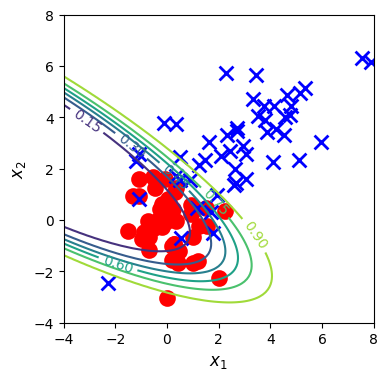

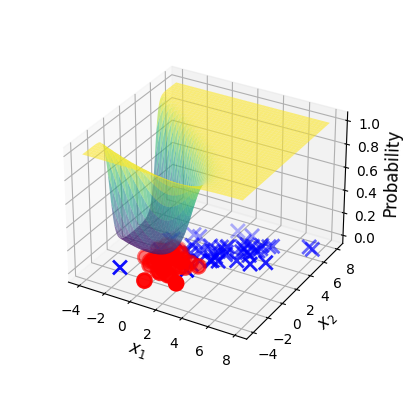

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.io import loadmat

# Load dataset
data = loadmat('twobumps.mat')
xtr = data['xtr']
ttr = data['ttr'].astype(int)

N = 100

# Calculations
N1 = np.sum(ttr)
N0 = N - N1
piML = N1 / N

indices_0 = np.where(ttr == 0)[0]
indices_1 = np.where(ttr == 1)[0]

mu0 = np.mean(xtr[indices_0], axis=0)
mu1 = np.mean(xtr[indices_1], axis=0)

Sigma0 = np.cov(xtr[indices_0].T, bias=True)
Sigma1 = np.cov(xtr[indices_1].T, bias=True)

# p calculation
xvec = np.linspace(-4, 8, 121)
L = len(xvec)
p = np.zeros((L, L))

for i1 in range(L):
    for i2 in range(L):
        x = np.array([xvec[i1], xvec[i2]])
        p[i1, i2] = piML * multivariate_normal.pdf(x, mu1, Sigma1) / \
                    (piML * multivariate_normal.pdf(x, mu1, Sigma1) + 
                     (1 - piML) * multivariate_normal.pdf(x, mu0, Sigma0))

# Contour plot
plt.figure(figsize=(4, 4))
contours = plt.contour(xvec, xvec, p, cmap='viridis')
plt.scatter(xtr[:N//2, 0], xtr[:N//2, 1], c='r', marker='o', s=100, linewidths=2)
plt.scatter(xtr[N//2:N, 0], xtr[N//2:N, 1], c='b', marker='x', s=100, linewidths=2)
plt.clabel(contours, inline=1, fontsize=10)
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)

# 3D Mesh plot
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(xvec, xvec)
ax.plot_surface(X, Y, p, cmap='viridis', alpha=0.6)
ax.scatter(xtr[:N//2, 0], xtr[:N//2, 1], np.zeros(N//2), c='r', marker='o', s=100, linewidths=2)
ax.scatter(xtr[N//2:N, 0], xtr[N//2:N, 1], np.zeros(N//2), c='b', marker='x', s=100, linewidths=2)
ax.set_xlabel('$x_1$', fontsize=12)
ax.set_ylabel('$x_2$', fontsize=12)
ax.set_zlabel('Probability', fontsize=12)
ax.set_box_aspect(aspect=None, zoom=0.825)

plt.show()